In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import networkx as nx
from pyvis.network import Network


In [12]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in xrange(0, len(l), n))

def swap1(paths):
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    path2index = random.randrange(len(paths))
    
    while len(paths[path2index]) == 0 :
        path2index = random.randrange(len(paths))
    
    while path1index == path2index:
        path1index = random.randrange(len(paths))
    
    randP1 = math.ceil(random.random()*2)
    randP2 = math.ceil(random.random()*2)

    path1 = np.array(paths[path1index]).tolist()
    path2 = np.array(paths[path2index]).tolist()
    
    y1 = path2[0] if randP2 == 1 else path2[len(path2)-1]
    path1.insert(0,y1)
    path2.remove(y1)
    paths[path1index] = path1
    paths[path2index] = path2
    return paths

In [13]:
def swap2(paths):
    print("swap entrées intra")
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    
    path1 = paths[path1index]
    
    while len(path1) < 2 :
        path1index = random.randrange(len(paths))
        path1 = paths[path1index]
        print("in while 1")
    
    
    rand1 = random.randrange(len(path1))
    
    rand2 = random.randrange(len(path1))
    
    print("randrange "+str(len(path1)))
    print("rand1 " + str(rand1))
    print("rand2 " + str(rand2))
    print(path1)
    
    while rand1 == rand2 :
        rand2 = random.randrange(len(path1))
        print("in while 2")
        print("regenerated rand2 "+ str(rand2))

    
    x1 = path1[rand1]
    x2 = path1[rand2]
    #same si 1 element
    
    path1[rand1] , path1[rand2] = path1[rand2] , path1[rand1]

    paths[path1index] = path1

    
    #print(path1)
    #print(path2)
    #print("swaped extra")
    return paths

In [14]:
def swap3(x):
    print("swap3")

In [15]:
def printError(x):
    print("random out of bound")

In [16]:
def switchAction(x):
    #print("x "+ str(x))
    switcher = {
        1:swap1,
        2:swap2,
        3:swap3
        
    }
    #print("xx "+ str(x))
    return switcher.get(x,printError)

In [444]:
def f(x, matrice):
    total_sum = 0
    for cycle in x :
        #print("cycle : "+ str(cycle))
        cycle_sum = 0
        if(len(cycle)>0) :
            #print(range(0,len(cycle)))
            for i in range(0,len(cycle)) :
                if i == 0 :
                    cycle_sum += matrice[cycle[i]][0]
                    #print("0 to node "+ str(cycle[i])+" : "+ str(matrice[cycle[i]][0]))
                else :
                    cycle_sum += matrice[cycle[i]][cycle[i-1]]
                    #print("node "+str(cycle[i-1])+" to node "+str(cycle[i])+" : "+str(matrice[cycle[i]][cycle[i-1]]))

            #print("node "+ str(cycle[len(cycle)-1])+" to 0 : "+ str(matrice[cycle[len(cycle)-1]][0]))    
            cycle_sum += matrice[cycle[len(cycle)-1]][0]
            #print("cycle sum "+ str(cycle_sum))
            total_sum += cycle_sum
    #print("total sum "+str(total_sum))
    return total_sum

In [445]:
def g(x, matrice):
    total_sum = 0
    for cycle in x :
        cycle_sum = 0
        if(len(cycle)>0) :
            for i in range(len(cycle)-1) :
                if i == 0 :
                    cycle_sum += matrice[0][cycle[i]]
                    print("0 to node "+ str(cycle[i])+" : "+ str(matrice[0][cycle[i]]))
                else :
                    cycle_sum += matrice[cycle[i-1]][cycle[i]]
                    print("node "+str(cycle[i-1])+" to node "+str(cycle[i])+" : "+str(matrice[cycle[i-1]][cycle[i]]))


            cycle_sum += matrice[0][len(cycle)-1]
            print("cycle sum "+ str(cycle_sum))
            total_sum += cycle_sum
    print("total sum "+str(total_sum))
    return total_sum

In [446]:
def recuit2(matrice,k,t, coef,n):

    fc = 500
    xstart = np.array_split(range(1,len(matrice),1),k)
    xc = np.array(xstart)
    print(xstart)
    print(xc)
    xc = xc.tolist()
    print(xc)
    
    na =0
    results = []
    allresults = []
    DeltaE_avg = 0.00000000001
    for i in range(n):
        randAction = random.randrange(1,3)
        swap = switchAction(1)
        xc = swap(xc)
        xi = xc
        totalCost = f(xi, matrice)
        DeltaE = abs(totalCost-fc)
        if (totalCost>fc):
            if(n==0) : DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc = xi
            fc = totalCost
            xopti = xc
            results.append(fc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        allresults.append(totalCost)
        t = coef*t

    plt.subplot(121)
    plt.plot(range(len(results)),results)
    print(fc)
    print(xopti)
    plt.show()

In [447]:
matrice = [
        [1,2,3,4,5,6],
        [7,8,9,10,11,12],
        [13,14,15,16,17,18],
        [19,20,21,22,23,24],
        [25,26,27,28,29,30],
        [31,32,33,34,35,36]
        
    ]

recuit2(matrice,2,10,1000)

print("fin")

TypeError: recuit2() missing 1 required positional argument: 'n'

In [448]:
myGraph4 = nx.Graph()
matrice = [
[0,21,2,51],
[31,0,3,2],
[2,3,0,2],
[41,2,2,0]
]

for i in range(len(matrice)):
    myGraph4.add_node(i)

for i in range(len(matrice)) :
    for j in range(len(matrice)) :
        if(i>j) :
            print(matrice[i][j])
            myGraph4.add_edge(i,j,weight=matrice[i][j])

    
g4 = Network(height=700, width=700, notebook= True)
g4.toggle_hide_edges_on_drag(False)
g4.barnes_hut()
g4.from_nx(myGraph4)
g4.show("ex5.html")


31
2
3
41
2
2


In [449]:
matrice2 = [
    [0,1,6,5,2,2,3,4,1,5],
    [1,0,3,4,1,2,4,2,1,3],
    [6,3,0,1,2,5,3,9,6,4],
    [5,4,1,0,7,3,1,5,2,7],
    [2,1,2,7,0,5,7,1,1,3],
    [2,2,5,3,5,0,6,3,2,6],
    [3,4,3,1,7,6,0,1,7,5],
    [4,2,9,6,1,3,1,0,2,3],
    [1,1,6,2,1,2,7,2,0,2],
    [5,3,4,7,3,6,5,3,2,0]
]

#recuit2(matrice2,2,5,1000000)

In [450]:
matrice3 = [
    [0,11,12,13,14,15,16,17,18,19],
    [11,0,3,4,1,2,4,2,1,3],
    [12,3,0,1,2,5,3,9,6,4],
    [13,4,1,0,7,3,1,5,2,7],
    [14,1,2,7,0,5,7,1,1,3],
    [15,2,5,3,5,0,6,3,2,6],
    [16,4,3,1,7,6,0,1,7,5],
    [17,2,9,6,1,3,1,0,2,3],
    [18,1,6,2,1,2,7,2,0,2],
    [19,3,4,7,3,6,5,3,2,0]
]

recuit2(matrice3,2,10,0.95,1000)

[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
truck to load pre swap [6, 7, 8, 9] (truck 11 )
truck to unload pre swap [1, 2, 3, 4, 5]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [451]:
def matriceToGraph(matrice):
    myGraph4 = nx.Graph()

    for i in range(len(matrice)):
        myGraph4.add_node(i)

    for i in range(len(matrice)) :
        for j in range(len(matrice)) :
            if(i>j) :
                #print(matrice[i][j])
                myGraph4.add_edge(i,j,weight=matrice[i][j])

    return myGraph4

In [452]:
def recuit3(matrice,k,t,n):
    paths = []
    fc = 500
    xstart = np.array_split(range(1,len(matrice),1),k)
    xc = np.array(xstart)
    #print(xstart)
    #print(xc)
    xc = xc.tolist()
    print(xc)
    
    na =0
    results = []
    allresults = []
    DeltaE_avg = 0.00000000001
    for i in range(n):
        randAction = random.randrange(1,2)
        swap = switchAction(randAction)
        #swap = switchAction(2)
        xc = swap(xc)
        xi = xc
        totalCost = f(xi, matrice)
        
        DeltaE = abs(totalCost-fc)
        if (totalCost>fc):
            if(n==0) : DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc = xi
            fc = totalCost
            xopti = xc.copy()
            xopti2 = []#xopti.copy()
            
            
            for path in xopti :
                path2 = path.copy()
                #print("path2" + str(path2))
                path2.insert(0,0)
                path2.insert(len(path2),0)
                xopti2.append(path2)
            
            paths.append(xopti2)
            #paths.append(xopti2)
            
            results.append(fc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        allresults.append(totalCost)
        t = 0.95*t

    print(fc)
    print(xopti)
   
    return paths

In [453]:
def convertPaths(paths):
    newPaths = []
    for path in paths:
        newPath = []
        for cycle in path:
            cycle2 = []
            for node in cycle :
                cycle2.append(str(node))
            newPath.append(cycle2)
        #print("new path"+ str(newPath))
        newPaths.append(newPath)
    return newPaths

<IPython.core.display.Javascript object>


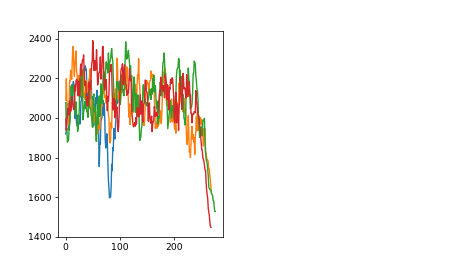

In [454]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation
%matplotlib notebook

fig, ax = plt.subplots(figsize=(7,4))

def update(num):
    

    print("fig "+str(fig))
    print("ax"+ str(ax))
    ax.clear()
    i = num // 3
    j = num % 3 + 1
    
    #cycles = paths[donePathNumber]
    
    
    newPaths = convertPaths(paths)
    cycles = newPaths[num]
    print(cycles)
    colors = ["red","blue","green","black","orange","purple","yellow","brown"]
    index = 0
    for path in cycles :
        # Query nodes
        #set_edgecolor(colors[index%len(colors)])
        #set_edgecolor("red")

        index += 1
        print("path "+ str(path))
        query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, ax=ax)
        query_nodes.set_edgecolor("blue")
        nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
        edgelist = [path[k:k+2] for k in range(len(path) - 1)]
        print("edge list" +str(edgelist))
        edges = nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=3, ax=ax)
        edges.set_edgecolor(colors[index%len(colors)])
        #edges.set_edgecolor("red")



    # Scale plot ax
    ax.set_title("Frame %d:    "%(num+1) + str(cycles), fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])

#test(1)


In [455]:

paths = [
    [0,1,2,3,4,5,6,7],
    [0,1,2,3,4,5]
]    

paths = [
    [[0,1,2,3,4,0],[0,5,6,7,0]],
    [[0,1,2,0],[0,3,4,5,0]] 
]
    
#print("paths avant "+ str(paths))
 
matrice_simple = [
    [0,1,2],
    [1,0,1],
    [2,1,0]
]

matrice_simple2 = [
    [0,1,2,3],
    [1,0,1,2],
    [2,1,0,2],
    [3,2,2,0]
]

matrice_complique = [
    [0,2,3,4,5,6],
    [2,0,7,8,9,10],
    [3,7,0,11,12,13],
    [4,8,11,0,14,15],
    [5,9,12,14,0,16],
    [6,10,13,15,16,0]
]

myMatrice = matrice3
    
paths = recuit3(myMatrice,2,5,1000)

#paths = result[0]

#print("paths après "+ str(paths))
#def plotGraph(paths):

# Create Graph
#G = nx.cubical_graph()
#def animate(paths):
G = matriceToGraph(myMatrice)


labels2 = {}
for i in G.nodes():
    labels2[i]= str(i)
G = nx.relabel_nodes(G, labels2)
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(7,4))
#fig2 = plt.figure()

#ax = fig2.add_subplot(1,1,1)

#update(1)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(paths), interval=100, repeat=False)
plt.show()
#return ani

#plotGraph(paths)


[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
truck to load pre swap [1, 2, 3, 4, 5] (truck 10 )
truck to unload pre swap [6, 7, 8, 9]


C:\Users\Nico\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [456]:
#fig, ax = plt.subplots(figsize=(7,4))
#animate(paths, fig, ax)

In [457]:

matrice_simple = [
    [0,1,2],
    [1,0,1],
    [2,1,0]
]
#paths = recuit3(matrice_simple, 1,5, 100)
#fig, ax = plt.subplots(figsize=(7,4))
#animate(paths, fig, ax)


In [458]:
#recuit2(matrice2, 2,10, 0.95,1000000)
recuit2(matrice2, 2,10, 0.95,1000)




[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]) array([6, 7, 8, 9])]
[array([1, 2, 3, 4, 5]), array([6, 7, 8, 9])]
truck to load pre swap [1, 2, 3, 4, 5] (truck 10 )
truck to unload pre swap []


C:\Users\Nico\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


ValueError: [] is not in list

In [459]:
#capaciteMax = 100
#allItems = {0:0,1:5,2:18,3:6,4:15,5:20,6:8,7:15,8:20,9:13}#, 10:21,11:25}
#print(allItems)

def getAllSwappableItems(currentPaths):
    #print("current paths:" + str(currentPaths))
    #if not all full, verif plus peit poid swap possible
    full = True
    allMovesAvailable = []
    truckId = 1
    for cycle in currentPaths:
        truckWeight = 0
        #print("cycles"+ str(cycles))
        available = []
        #for cycle in cycles:

        #print("truck "+ str(truckId)+" " + str(cycle))
        for node in cycle: 
            if(node == 0):
                continue
            
            truckWeight += allItems[node]
            #print("truckweight : " + str(truckWeight))

        #print("final truckweight : " + str(truckWeight))
        #print("max capa: "+ str(capaciteMax))
        if truckWeight < capaciteMax :
            freeSpace = capaciteMax - truckWeight
            #print("freespace "+str(freeSpace))
            full = False

            for index in allItems:
                if index not in cycle:
                    itemWeight = allItems.get(index)
                    #print("index"+ str(index))
                    #print("poid camion "+ str(truckWeight))
                    #print("poid item "+ str(allItems.get(index)))
                    if ((truckWeight+ itemWeight) <= capaciteMax ) and index != 0:
                    #same thing as
                    #if(itemWeight <= freeSpace)
                        #print("can add "+ str(index) +" of weight "+ str(itemWeight) + " to truck "+str(truckId)+" that has "+ str(freeSpace)+ " available sapce")
                        available.append(index)
                    #else : 
                        #print("CAN'T add "+ str(index) +" of weight "+ str(itemWeight) + " to truck "+ str(truckId) + "that has "+ str(freeSpace)+ " available space")

                #[x for x in allItems if x not in cycle]
                #print(x)
        #print("all movables for cycle "+ str(cycle)+" : "+str(available))
        allMovesAvailable.append(available)
        truckId += 1
    #print("all movables this tick "+ str(allMovesAvailable))
    return allMovesAvailable

def allAreFull(paths):
    full = True
    for path in paths:
        weight = 0
        for node in path:
            weight += allItem[node]
        if weight < capaciteMax :
            full = False
    return full


def swapExtraCVRP(paths):#, allItems, capaciteMax):
    
    swappableItem = getAllSwappableItems(paths)
    
    #paths = paths.tolist()
    path1index = random.randrange(len(paths))
    indexTruckToLoad = random.randrange(len(paths))

    #path2index = random.randrange(len(paths))
    
    
    #while len(paths[path2index]) == 0 :
    #    path2index = random.randrange(len(paths))
    
    '''
    #ca devrait aussi marcher si on fait
    
    while len(swappableItem[path1index]) == 0:
        rerand1
      
    while path1index==path2index :
        rerand2
    
    
    '''
    
    for i in range(len(allItems)*3) : 
        if len(swappableItem[indexTruckToLoad]) == 0 : # or len(paths[path2index]) == 0 or path1index==path2index:
            #path2index = random.randrange(len(paths))
            #print("in while")
            indexTruckToLoad = random.randrange(len(paths))
        else :
            #print("i'm in")
            break
        if i == len(allItems)*3 - 1:
            #print("i'm out")
            return paths
    
    #print("swappable in truck "+str(indexTruckToLoad)+" : "+str(swappableItem[indexTruckToLoad]))
 
    
    
    truckToLoad = np.array(paths[indexTruckToLoad]).tolist()
    #path2 = np.array(paths[path2index]).tolist()
    
    insertIndex = random.randrange(0,len(truckToLoad)-1) if len(truckToLoad) > 1 else 0
    extractIndex = random.randrange(0,len(swappableItem[indexTruckToLoad])-1) if len(swappableItem[indexTruckToLoad]) > 1 else 0
    
    #print("extract index "+str(extractIndex))
    
    #print("truck to load pre swap "+ str(truckToLoad)+" (truck "+str(indexTruckToLoad+10)+" )")
    #print("p2 pre swap "+ str(path2)+" (truck "+str(path2index+10)+" )")
    
    truckToUnload = []
    
    #take from the list of item possible to load in TruckToLoad
    #print("take from "+  str(swappableItem[indexTruckToLoad]))
    itemToLoad = swappableItem[indexTruckToLoad][extractIndex]
    
    #find path to extract from
    for truck in paths:
        if itemToLoad in truck:
            truckToUnload = np.array(truck).tolist()
            #print("truck to unload pre swap "+ str(truckToUnload))
            
    #print("truck to unload pre swap "+ str(truckToUnload))
    indexTruckToUnLoad = paths.index(truckToUnload)
    
    # = path2.tolist()
    #print("swap "+str(itemToLoad))
    truckToLoad.insert(insertIndex,itemToLoad)
    truckToUnload.remove(itemToLoad)
    paths[indexTruckToLoad] = truckToLoad
    paths[indexTruckToUnLoad] = truckToUnload

    
    #print("to load post swap "+ str(truckToLoad))
    #print("to unload post swap "+ str(truckToUnload))
    #print("")
    
    return paths

In [460]:
'''
swapExtraCVRP(paths[0])
swapExtraCVRP(paths[0])
swapExtraCVRP(paths[0])
swapExtraCVRP(paths[0])
'''

'\nswapExtraCVRP(paths[0])\nswapExtraCVRP(paths[0])\nswapExtraCVRP(paths[0])\nswapExtraCVRP(paths[0])\n'

In [461]:
def switchAction(x):
    #print("x "+ str(x))
    switcher = {
        1:swapExtraCVRP,
        2:swap2
        
    }
    #print("xx "+ str(x))
    return switcher.get(x,printError)

In [462]:
def recuitCVRPGraph(matrice, allItems, k, capaciteMax, t, coef, n):
    paths = []
    fc = 1000000000
    #xstart = np.array_split(range(1,len(matrice),1),k)
    xstart = splitClients(allItems, k, capaciteMax)
    xc = np.array(xstart)
    print("xstart"+ str(xstart))
    #print(xc)
    xc = xc.tolist()
    #print(xc)
    
    na =0
    results = []
    allresults = []
    DeltaE_avg = 0.00000000001
    for i in range(n):
        randAction = random.randrange(1,2)
        swap = switchAction(randAction)
        #swap = switchAction(2)
        #print("pre swap "+ str(xc))
        xc = swap(xc)
        #print("post swap "+ str(xc))

        
        if len(xc) > k:
            print("It's impossible to deliver all items with "+str(k)+ " trucks, we need "+str(len(xc)) + "at minimum")
        if len(xc) < k:
            for j in range(0,k-len(xc)) :
                xc.append([])
        #print("new xstart"+ str(xc))

        
        
        xi = xc
        totalCost = f(xi, matrice)
        #print("cost" + str(totalCost))

        DeltaE = abs(totalCost-fc)
        if (totalCost>fc):
            if(n==0) : DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                #print("nope")
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc = xi
            fc = totalCost
            xopti = xc.copy()
            xopti2 = []#xopti.copy()
            #print("accepted "+ str(xc))
            
            for path in xopti :
                path2 = np.array(path.copy()).tolist()
                #print("path2" + str(path2))
                path2.insert(0,0)
                path2.insert(len(path2),0)
                xopti2.append(path2)
            
            paths.append(xopti2)
            #paths.append(xopti2)
            #print("fc = "+ str(fc))
            results.append(fc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        allresults.append(totalCost)
        t = coef*t
        #print("iter")
    
    print(fc)
    print(xopti)
   
    return paths, results, allresults

In [463]:
def splitClients(allItems, k, capaciteMax):
    splitList = []
    currentWeight = 0
    totalWeight = 0

    #print("allItems" + str(allItems))
    print(allItems)
    for itemIndex in allItems :
        totalWeight += allItems[itemIndex]
    
    averageWeight = totalWeight/k
    #print("total weight "+ str(totalWeight))
    #print("average wieght" + str(averageWeight))
    currentTruck = []
    for itemIndex in allItems :
        #print("item at index " + str(itemIndex))
        if itemIndex == 0 :
            continue
        if currentWeight+ allItems[itemIndex] < capaciteMax :

            if currentWeight< averageWeight :
                #print("current item "+ str(allItems[itemIndex]))
                currentTruck.append(itemIndex)
                currentWeight += allItems[itemIndex]
            else :
                #print("reached "+ str(currentWeight))
                currentTruck.append(itemIndex)
                currentWeight += allItems[itemIndex]
                #print("adding truck "+ str(currentTruck)+ " with weight "+ str(currentWeight))
                currentWeight = 0
                splitList.append(currentTruck.copy())
                currentTruck.clear()
                #print("1st current truck  " + str(currentTruck))
        else : 
            #print("reached "+ str(currentWeight)+ ", next item "+ str(allItems[itemIndex]) + "would overload")
            #print("adding truck "+ str(currentTruck)+ " with weight "+ str(currentWeight))
            currentWeight = 0
            splitList.append(currentTruck.copy())
            currentTruck.clear()
            currentTruck.append(itemIndex)
            currentWeight += allItems[itemIndex]
            #print("2nd current truck " + str(currentTruck))
            
            
    if currentWeight > 0 :
        #print("adding last truck "+ str(currentTruck)+ " with weight "+ str(currentWeight))
        splitList.append(currentTruck)
        
    return splitList

#allItems = {0:0,1:5,2:18,3:6,4:15,5:20,6:8,7:15,8:20,9:13}
allItems = {0:0,1:24,2:18,3:30,4:45,5:20,6:12,7:15,8:20,9:13}#, 10:21,11:25}

test = splitClients(allItems, 7, 50)
print("test" + str(test))

{0: 0, 1: 24, 2: 18, 3: 30, 4: 45, 5: 20, 6: 12, 7: 15, 8: 20, 9: 13}
test[[1, 2], [3], [4], [5, 6, 7], [8, 9]]


In [464]:
from parse import parse
from math import hypot

fileName = "input.txt"

def parseFile(fileName):

    instance = {
        'nodes' : list()
    }

    citiesCount = None

    with open(fileName, 'rt') as myFile:
        python_ne_sait_pas_faire_des_iterators_section = 0

        for line in myFile.readlines():
            if line.startswith("NAME : "):
                instance['name'] = parse('NAME : {}', line)[0]
            elif line.startswith("COMMENT : "):
                temp, instance['trucksCount'], instance['optimalValue'] = parse('COMMENT : {} No of trucks: {}, Optimal value: {})', line)            
            elif line.startswith("TYPE : "):
                continue
            elif line.startswith("DIMENSION : "):
                citiesCount = int(parse('DIMENSION : {}', line)[0])
            elif line.startswith("EDGE_WEIGHT_TYPE : "):
                continue
            elif line.startswith("CAPACITY : "):
                instance['trucksCapacity'] = int(parse('CAPACITY : {}', line)[0])
            elif line.startswith("NODE_COORD_SECTION "):
                python_ne_sait_pas_faire_des_iterators_section = 1
                continue
            elif line.startswith("DEMAND_SECTION "):
                python_ne_sait_pas_faire_des_iterators_section = 2
                continue
            elif line.startswith("DEPOT_SECTION "):
                python_ne_sait_pas_faire_des_iterators_section = 3
                continue

            #ni des switch...
            if python_ne_sait_pas_faire_des_iterators_section == 1:
                id, x, y = parse(' {} {} {}', line)
                instance['nodes'].append({'id':int(id) - 1, 'x':int(x), 'y':int(y)})
            elif python_ne_sait_pas_faire_des_iterators_section == 2:
                id, demand = parse('{} {}', line)
                instance['nodes'][int(id) - 1]['demand'] = demand[:-1]
            elif python_ne_sait_pas_faire_des_iterators_section == 3:
                instance['depotNodeId'] = int(parse(' {}', line)[0])
                break;

    if citiesCount is None:
        raise Exception('CitiesCount cannot be None, verify that the input file as a valid format')

    instance['matrix'] = [[0]*citiesCount for i in range(citiesCount)]
    #print(citiesCount)

    for fromNode in instance['nodes']:
        for toNode in instance['nodes'][fromNode['id']:citiesCount]:
            dist = int(hypot(toNode['x'] - fromNode['x'], toNode['y'] - fromNode['y']))
            instance['matrix'][fromNode['id']][toNode['id']] = dist
            instance['matrix'][toNode['id']][fromNode['id']] = dist


    #print(instance)
    #print("")
    matrix = instance['matrix']
    truckCapacity = int(instance['trucksCapacity'])
    truckCount = int(instance['trucksCount'])
    #print("")
    print(instance['nodes'])

    weights = {}

    for demand in instance['nodes']:
        weights[demand.get('id')] = int(demand.get('demand'))

    #print(weights)

    return weights, matrix, truckCount, truckCapacity

parseFile(fileName)

[{'id': 0, 'x': 82, 'y': 76, 'demand': '0'}, {'id': 1, 'x': 96, 'y': 44, 'demand': '19'}, {'id': 2, 'x': 50, 'y': 5, 'demand': '21'}, {'id': 3, 'x': 49, 'y': 8, 'demand': '6'}, {'id': 4, 'x': 13, 'y': 7, 'demand': '19'}, {'id': 5, 'x': 29, 'y': 89, 'demand': '7'}, {'id': 6, 'x': 58, 'y': 30, 'demand': '12'}, {'id': 7, 'x': 84, 'y': 39, 'demand': '16'}, {'id': 8, 'x': 14, 'y': 24, 'demand': '6'}, {'id': 9, 'x': 2, 'y': 39, 'demand': '16'}, {'id': 10, 'x': 3, 'y': 82, 'demand': '8'}, {'id': 11, 'x': 5, 'y': 10, 'demand': '14'}, {'id': 12, 'x': 98, 'y': 52, 'demand': '21'}, {'id': 13, 'x': 84, 'y': 25, 'demand': '16'}, {'id': 14, 'x': 61, 'y': 59, 'demand': '3'}, {'id': 15, 'x': 1, 'y': 65, 'demand': '22'}, {'id': 16, 'x': 88, 'y': 51, 'demand': '18'}, {'id': 17, 'x': 91, 'y': 2, 'demand': '19'}, {'id': 18, 'x': 19, 'y': 32, 'demand': '1'}, {'id': 19, 'x': 93, 'y': 3, 'demand': '24'}, {'id': 20, 'x': 50, 'y': 93, 'demand': '8'}, {'id': 21, 'x': 98, 'y': 14, 'demand': '12'}, {'id': 22, 'x'

({0: 0,
  1: 19,
  2: 21,
  3: 6,
  4: 19,
  5: 7,
  6: 12,
  7: 16,
  8: 6,
  9: 16,
  10: 8,
  11: 14,
  12: 21,
  13: 16,
  14: 3,
  15: 22,
  16: 18,
  17: 19,
  18: 1,
  19: 24,
  20: 8,
  21: 12,
  22: 4,
  23: 8,
  24: 24,
  25: 24,
  26: 2,
  27: 20,
  28: 15,
  29: 2,
  30: 14,
  31: 9},
 [[0,
   34,
   77,
   75,
   97,
   54,
   51,
   37,
   85,
   88,
   79,
   101,
   28,
   51,
   27,
   81,
   25,
   74,
   76,
   73,
   36,
   64,
   84,
   78,
   25,
   75,
   21,
   25,
   84,
   62,
   16,
   72],
  [34,
   0,
   60,
   59,
   90,
   80,
   40,
   13,
   84,
   94,
   100,
   97,
   8,
   22,
   38,
   97,
   10,
   42,
   77,
   41,
   67,
   30,
   91,
   64,
   39,
   101,
   19,
   46,
   78,
   80,
   19,
   39],
  [77,
   60,
   0,
   3,
   37,
   86,
   26,
   48,
   40,
   58,
   90,
   45,
   67,
   39,
   55,
   77,
   59,
   41,
   41,
   43,
   88,
   48,
   58,
   8,
   58,
   100,
   58,
   64,
   28,
   71,
   65,
   48],
  [75,
   59,
   3,
   0,
   

[{'id': 0, 'x': 82, 'y': 76, 'demand': '0'}, {'id': 1, 'x': 96, 'y': 44, 'demand': '19'}, {'id': 2, 'x': 50, 'y': 5, 'demand': '21'}, {'id': 3, 'x': 49, 'y': 8, 'demand': '6'}, {'id': 4, 'x': 13, 'y': 7, 'demand': '19'}, {'id': 5, 'x': 29, 'y': 89, 'demand': '7'}, {'id': 6, 'x': 58, 'y': 30, 'demand': '12'}, {'id': 7, 'x': 84, 'y': 39, 'demand': '16'}, {'id': 8, 'x': 14, 'y': 24, 'demand': '6'}, {'id': 9, 'x': 2, 'y': 39, 'demand': '16'}, {'id': 10, 'x': 3, 'y': 82, 'demand': '8'}, {'id': 11, 'x': 5, 'y': 10, 'demand': '14'}, {'id': 12, 'x': 98, 'y': 52, 'demand': '21'}, {'id': 13, 'x': 84, 'y': 25, 'demand': '16'}, {'id': 14, 'x': 61, 'y': 59, 'demand': '3'}, {'id': 15, 'x': 1, 'y': 65, 'demand': '22'}, {'id': 16, 'x': 88, 'y': 51, 'demand': '18'}, {'id': 17, 'x': 91, 'y': 2, 'demand': '19'}, {'id': 18, 'x': 19, 'y': 32, 'demand': '1'}, {'id': 19, 'x': 93, 'y': 3, 'demand': '24'}, {'id': 20, 'x': 50, 'y': 93, 'demand': '8'}, {'id': 21, 'x': 98, 'y': 14, 'demand': '12'}, {'id': 22, 'x'

C:\Users\Nico\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<IPython.core.display.Javascript object>


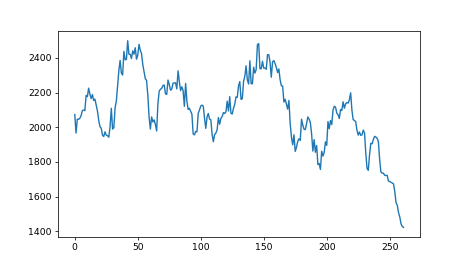

In [475]:
allItems, myMatrice, truckCount, truckCapacity = parseFile(fileName)


#allItems = {0:0,1:24,2:18,3:30,4:45,5:20,6:12,7:15,8:20,9:13}#, 10:21,11:25}
#capaciteMax = 50


#paths, results, allResults = recuitCVRPGraph(myMatrice, allItems, truckCount, truckCapacity, 10, 0.95, 100000)
paths, myresults, allmyresults = recuitCVRPGraph(myMatrice, allItems, truckCount, truckCapacity, 2, 0.95, 1000000)
#print("results"+ str(myresults))
print("done")


plt.subplot(121)
plt.plot(range(len(myresults)),myresults)
#plt.plot(range(len(myresults)),myresults)

print("idc")

G = matriceToGraph(myMatrice)


labels2 = {}
for i in G.nodes():
    labels2[i]= str(i)
G = nx.relabel_nodes(G, labels2)
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(7,4))


plt.plot(range(len(myresults)),myresults)
#plt.plot(range(len(allResults)),allResults)


#fig2 = plt.figure()

#ax = fig2.add_subplot(1,1,1)

#update(1)

#ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(paths), interval=5, repeat=False)
#plt.show()
#return ani

#plotGraph(paths)
